In [74]:


# Load the data
file_path = 'C:/Users/megar/OneDrive/Documenten/Business Analytics Management/Scriptie/Output/site_info_manual_checked.xlsx'
data = pd.read_excel(file_path)

# create two datasets one with outliers and one without, This will also remove the entries without price
# Calculate the z-score for 'Price/month'
z_scores = (unique_data['Price/month'] - unique_data['Price/month'].mean()) / unique_data['Price/month'].std()

# Identify the outliers
outliers = unique_data[abs(z_scores) > 3]

# Remove the outliers
unique_data = unique_data[abs(z_scores) <= 3]

# Perform descriptive analysis
descriptive_stats = unique_data.describe()

# Additional descriptive statistics for 'Price/month' by country
price_stats_by_country = unique_data.groupby('country')['Price/month'].describe()

# Output the results
print("Descriptive Statistics for Filtered Data:")
print(descriptive_stats)
print("\nDescriptive Statistics for 'Price/month' by Country:")
print(price_stats_by_country)


Descriptive Statistics for Filtered Data:
              ...1  popularity     cookies      bad_qs     tracked  \
count   273.000000  273.000000  273.000000  273.000000  273.000000   
mean   2579.315018    0.004936    0.320043    0.051318    0.329927   
std    2505.593279    0.017157    0.236941    0.060601    0.234721   
min       4.000000    0.000057    0.001951    0.000000    0.002401   
25%     453.000000    0.000212    0.144334    0.016168    0.154892   
50%    1652.000000    0.000557    0.246946    0.030267    0.274229   
75%    4216.000000    0.001980    0.438701    0.062709    0.453140   
max    9998.000000    0.149838    0.958861    0.471331    0.958861   

            https     requests  requests_tracking  content_length  \
count  273.000000   273.000000         273.000000    2.730000e+02   
mean     0.991367    71.963146          11.399134    3.851388e+06   
std      0.064659    79.904182          17.004212    2.082083e+07   
min      0.025266     4.488971           0.005102  

In [27]:
import pandas as pd
merged_data = pd.read_excel('C:/Users/megar/OneDrive/Documenten/Business Analytics Management/Scriptie/Output/dataset_using_5-6-2024.xlsx')

# add price to finanzmarkwelt.de for 49.00
merged_data.loc[merged_data['site'] == 'finanzmarktwelt.de', 'Price'] = 49.00

# add a pass variable to the dataset that is 1 if Freechoice or Contentpass is 1
merged_data['Pass'] = 0
merged_data.loc[merged_data['Freechoice'] == 1, 'Pass'] = 1
merged_data.loc[merged_data['Contentpass'] == 1, 'Pass'] = 1

#remove the variables with no data on the price
merged_data_no_price = merged_data.dropna(subset=['Price'])

p_merged_data_no_price = merged_data_no_price[merged_data_no_price['Pass'] == 1]
np_merged_data_no_price = merged_data_no_price[merged_data_no_price['Pass'] == 0]
#print which rows are removed
print("The rows removed are:")
print(merged_data[~merged_data.index.isin(merged_data_no_price.index)])


The rows removed are:
          base_domain  ...1    month country              site       category  \
100   freshdirect.com  9516  2024-04      us   freshdirect.com  Uncategorized   
150  jack-wolfskin.de  4274  2024-04      de  jack-wolfskin.de  Uncategorized   
197       mobiflip.de  4502  2024-04      de       mobiflip.de  Uncategorized   
212     niteflirt.com  4282  2024-04      us     niteflirt.com          Adult   

     popularity   cookies    bad_qs   tracked  ...     hosts  trackers  \
100    0.000055  0.327103  0.040109  0.327492  ...  3.963396  3.566199   
150    0.000209  0.219010  0.005545  0.222178  ...  4.192475  3.016238   
197    0.000198  0.090528  0.019698  0.098910  ...  5.060771  4.055323   
212    0.000141  0.266345  0.000753  0.266345  ...  6.243899  5.439138   

     companies              URLs  Price  Category  Country  Freechoice  \
100   2.822819   freshdirect.com    NaN       NaN      NaN           0   
150   2.982970  jack-wolfskin.de    NaN       NaN    

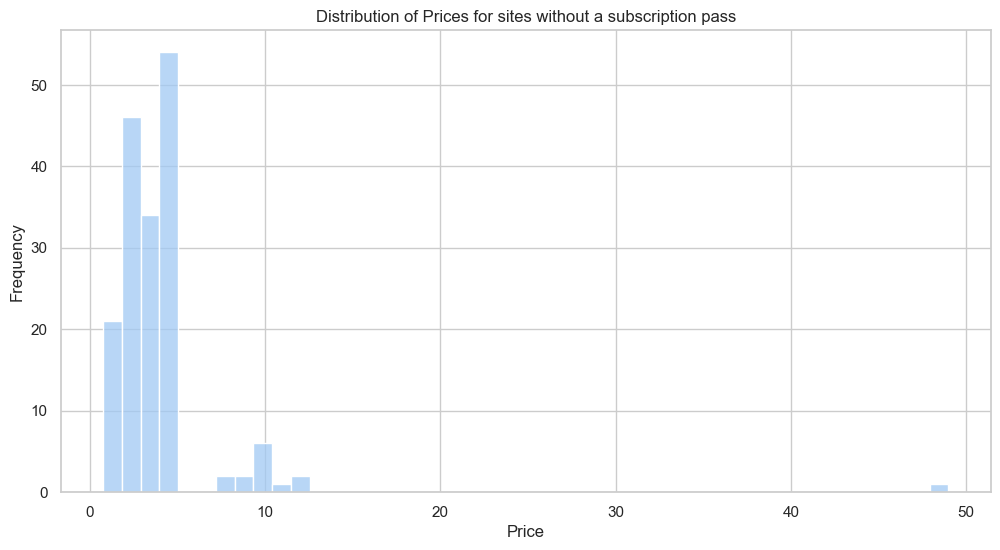

C:\Users\megar\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\megar\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


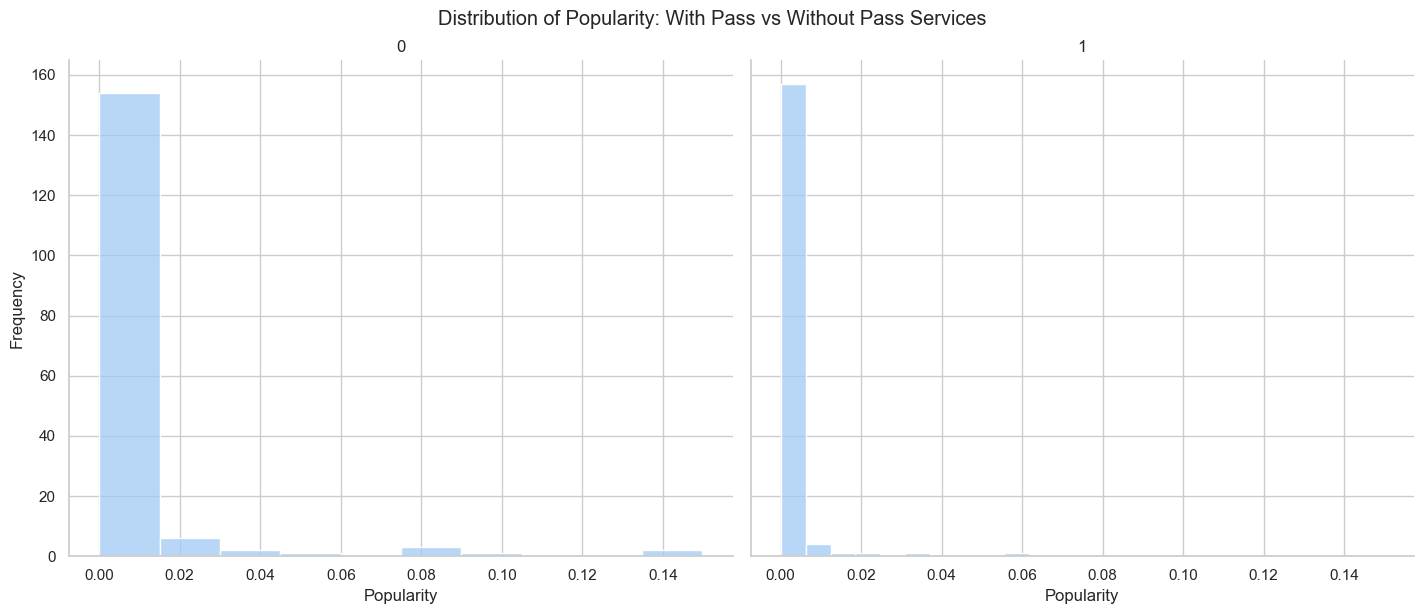

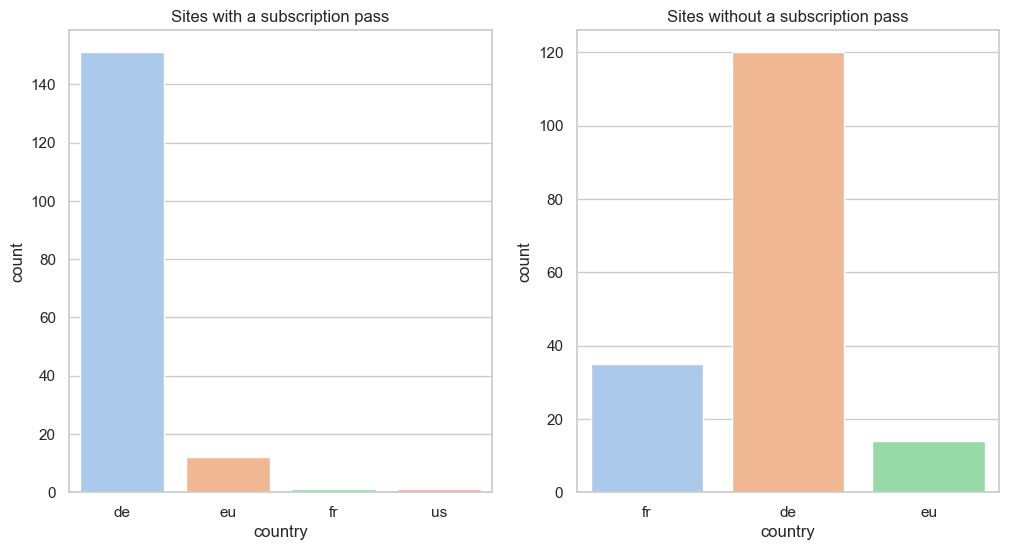

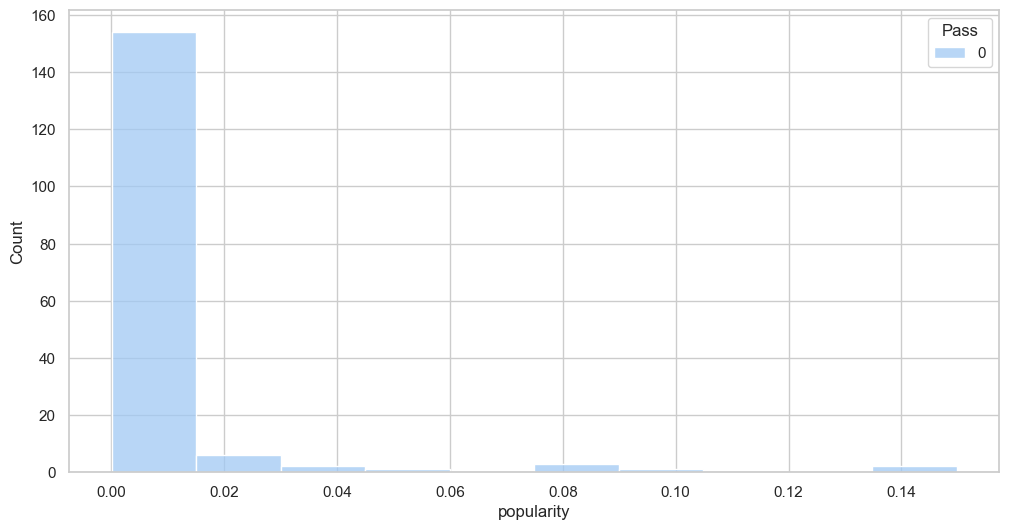

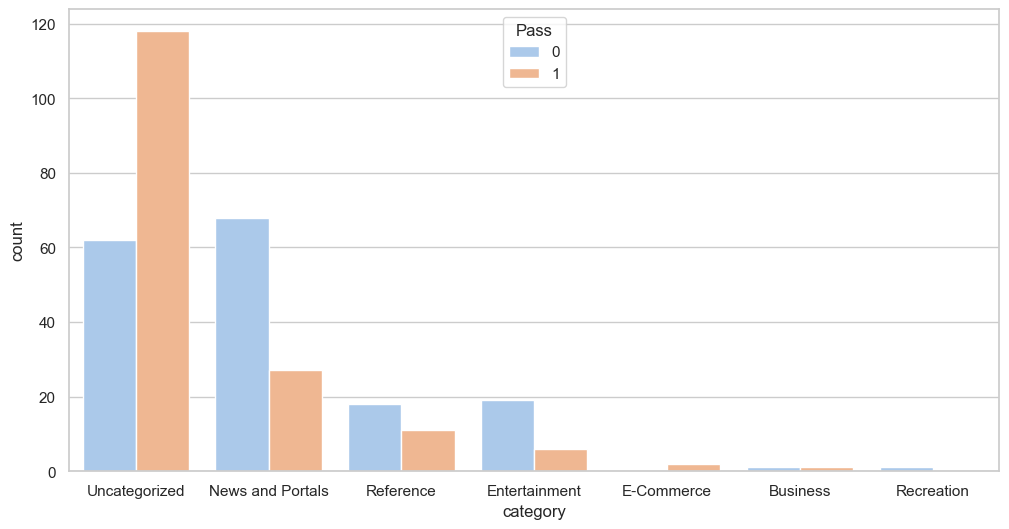

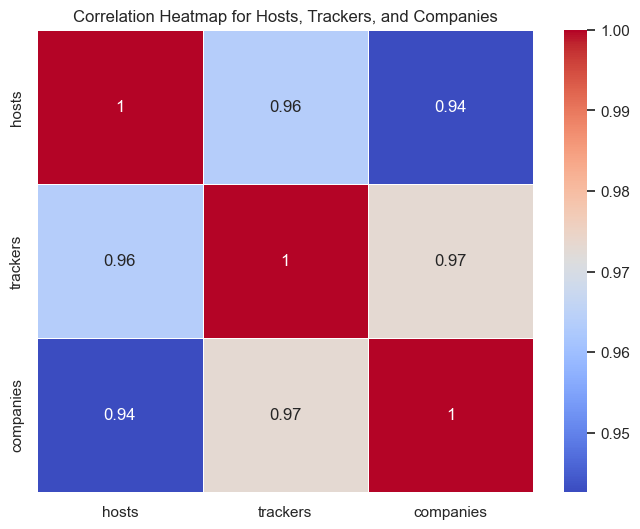

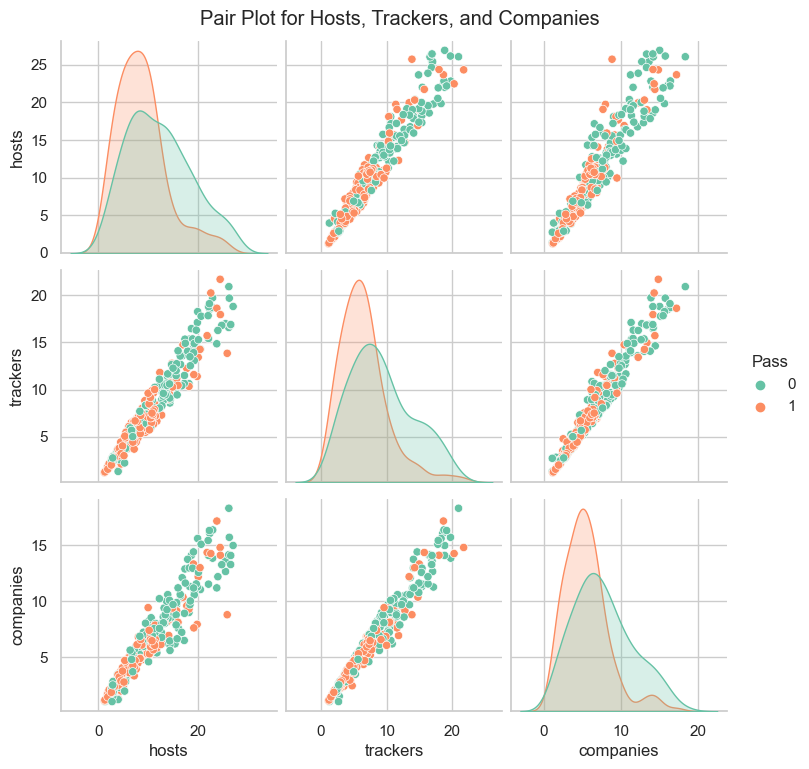

Freechoice count: 52
Contentpass count: 113


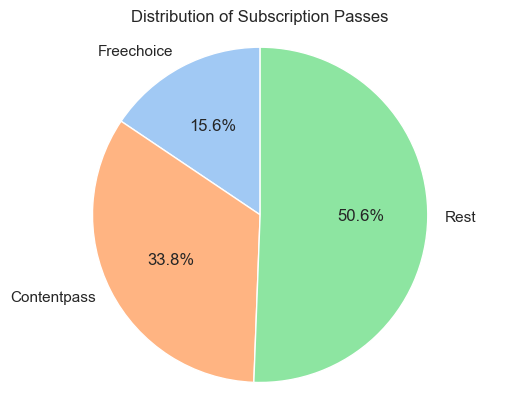

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(12, 6))
sns.histplot(data=np_merged_data_no_price, x='Price')
plt.title('Distribution of Prices for sites without a subscription pass')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Create a FacetGrid for separate plots
g = sns.FacetGrid(merged_data_no_price, col='Pass', height=6, aspect=1.2, palette='Set2')
g.map(sns.histplot, 'popularity', bins=10)

# Set titles and labels
g.set_axis_labels('Popularity', 'Frequency')
g.set_titles(col_template="{col_name}")

# Display the plots
plt.suptitle('Distribution of Popularity: With Pass vs Without Pass Services', y=1.02)
plt.show()

# country piechart for the sites with a subscription pass and without, in one figure side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(data=p_merged_data_no_price, x='country', ax=ax[0])
ax[0].set_title('Sites with a subscription pass')
sns.countplot(data=np_merged_data_no_price, x='country', ax=ax[1])
ax[1].set_title('Sites without a subscription pass')


plt.figure(figsize=(12, 6))
sns.histplot(data=np_merged_data_no_price, x='popularity', hue='Pass', multiple='stack', bins=10)

# category
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data_no_price, x='category', hue='Pass', order=merged_data_no_price['category'].value_counts().index)

# Scatter plot
# Calculate correlation matrix
corr_matrix = merged_data_no_price[['hosts', 'trackers', 'companies']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Hosts, Trackers, and Companies')
plt.show()
# Pair plot for hosts, trackers, and companies
sns.pairplot(merged_data_no_price, vars=['hosts', 'trackers', 'companies'], hue='Pass', palette='Set2')
plt.suptitle('Pair Plot for Hosts, Trackers, and Companies', y=1.02)
plt.show()

# 6. Pie chart of distribution pass which pass, to do this we need to count the amount for Freechoice and the amount for Contentpass
# Count the number of sites with Freechoice and Contentpass
Freechoice_counts = (merged_data_no_price['Freechoice'] == 1).sum()
Content_pass_counts = (merged_data_no_price['Contentpass'] == 1).sum()

print("Freechoice count:", Freechoice_counts)
print("Contentpass count:", Content_pass_counts)

Rest = len(merged_data_no_price) - Freechoice_counts - Content_pass_counts

# Create a pie chart
fig, ax = plt.subplots()
ax.pie([Freechoice_counts, Content_pass_counts, Rest], labels=['Freechoice', 'Contentpass', 'Rest'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Distribution of Subscription Passes')
plt.show()





In [69]:
# I want a table with  (1) price, (2) country, (3) popularity ,(4) category (5) Hosts/Trackers/Companies averages and standard deviation, for the total group and the pass subgroup
# Calculate the averages and standard deviations for the total group
total_group = merged_data_no_price[['Price', 'popularity', 'hosts', 'trackers', 'companies']].describe().loc[['mean', 'std']]
total_group = total_group.rename(index={'mean': 'Total Mean', 'std': 'Total Std'})

# Calculate the averages and standard deviations for the pass subgroup
pass_group = p_merged_data_no_price[['Price', 'popularity', 'hosts', 'trackers', 'companies']].describe().loc[['mean', 'std']]
pass_group = pass_group.rename(index={'mean': 'Pass Mean', 'std': 'Pass Std'})

# Calculate the averages and standard deviations for the no pass subgroup
no_pass_group = np_merged_data_no_price[['Price', 'popularity', 'hosts', 'trackers', 'companies']].describe().loc[['mean', 'std']]
no_pass_group = no_pass_group.rename(index={'mean': 'No Pass Mean', 'std': 'No Pass Std'})

# Concatenate the results
summary_table = pd.concat([total_group, pass_group, no_pass_group], axis=0)

# change the index to the columns
summary_table = summary_table.T
print(summary_table)



            Total Mean  Total Std  Pass Mean  Pass Std  No Pass Mean  \
Price         3.768743   2.975633   3.674848  0.465990      3.860414   
popularity    0.004302   0.015737   0.001658  0.006037      0.006883   
hosts        10.435456   6.032326   8.658617  5.089532     12.170239   
trackers      7.857146   4.477926   6.473435  3.679709      9.208106   
companies     6.546950   3.569131   5.441032  2.881088      7.626691   

            No Pass Std  
Price          4.161920  
popularity     0.021017  
hosts          6.380702  
trackers       4.776116  
companies      3.843551  


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio

# Create a directory to save the frames
import os
frames_dir = 'C:/Users/megar/OneDrive/Documenten/Business Analytics Management/Scriptie/Output/frames'
os.makedirs(frames_dir, exist_ok=True)

# 3D Scatter Plot data preparation
colors = {1: 'blue', 0: 'green'}
color_map = merged_data_no_price['Pass'].map(colors)

# Number of frames for the GIF
num_frames = 36

# Generate frames
for i in range(num_frames):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot
    ax.scatter(merged_data_no_price['hosts'], merged_data_no_price['trackers'], merged_data_no_price['companies'],
               c=color_map, label=merged_data_no_price['Pass'])
    
    ax.set_xlabel('Hosts')
    ax.set_ylabel('Trackers')
    ax.set_zlabel('Companies')
    plt.title('3D Scatter Plot for Hosts, Trackers, and Companies')
    
    # Rotate the view for each frame
    ax.view_init(elev=20., azim=i * 10)
    
    # Save the frame
    frame_filename = os.path.join(frames_dir, f'frame_{i}.png')
    plt.savefig(frame_filename)
    plt.close()

# Create a GIF from the frames
frames = []
for i in range(num_frames):
    frame_filename = os.path.join(frames_dir, f'frame_{i}.png')
    frames.append(imageio.imread(frame_filename))

# Save the frames as a GIF
gif_filename = 'C:/Users/megar/OneDrive/Documenten/Business Analytics Management/Scriptie/Output/3d_scatter_rotation.gif'
imageio.mimsave(gif_filename, frames, duration=0.1)

gif_filename


C:\Users\megar\AppData\Local\Temp\ipykernel_32536\3475879695.py:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_filename))


'C:/Users/megar/OneDrive/Documenten/Business Analytics Management/Scriptie/Output/3d_scatter_rotation.gif'

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

def generate_plots(
    df,
    country_col='country',
    price_col='Price',
    popularity_col='popularity',
    cookies_col='cookies',
    category_col='Category',
    trackers_col='trackers',
    companies_col='companies',
    https_col='https',
    hosts='hosts'
):
    # 1. Price Distribution by Country
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=country_col, y=price_col, data=df)
    plt.title('Price Distribution by Country')
    plt.ylabel('Price per Month (€)')
    plt.xlabel('Country')
    plt.show()

    # 2. Popularity and Cookies
    plt.figure(figsize=(10, 6))
    sns.regplot(x=popularity_col, y=cookies_col, data=df)
    sns.scatterplot(x=popularity_col, y=cookies_col, hue=country_col, data=df)
    plt.title('Popularity vs Cookies')
    plt.xlabel('Popularity')
    plt.ylabel('Number of Cookies')
    plt.legend(title='Country')
    plt.show()

    # 3. Distribution of Categories
    plt.figure(figsize=(12, 6))
    sns.countplot(y=category_col, data=df, order=df[category_col].value_counts().index)
    plt.title('Distribution of Website Categories')
    plt.xlabel('Count')
    plt.ylabel('Category')
    plt.show()

    # 4. Hosts, Trackers and Companies
    plt.figure(figsize=(10, 6))
    sns.histplot(df[hosts], kde=True, bins=20)
    plt.title('Distribution of Hosts')
    plt.xlabel('Number of Hosts')
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df[trackers_col], kde=True, bins=20)
    plt.title('Distribution of Trackers')
    plt.xlabel('Number of Trackers')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(df[companies_col], kde=True, bins=20)
    plt.title('Distribution of Companies Involved')
    plt.xlabel('Number of Companies')
    plt.ylabel('Frequency')
    plt.show()
    
    # 5. Popularity
    plt.figure(figsize=(10, 6))
    sns.histplot(df[popularity_col], kde=True, bins=20)
    plt.title('Distribution of Popularity')
    plt.xlabel('Popularity')
    plt.ylabel('Frequency')
    plt.show()
    


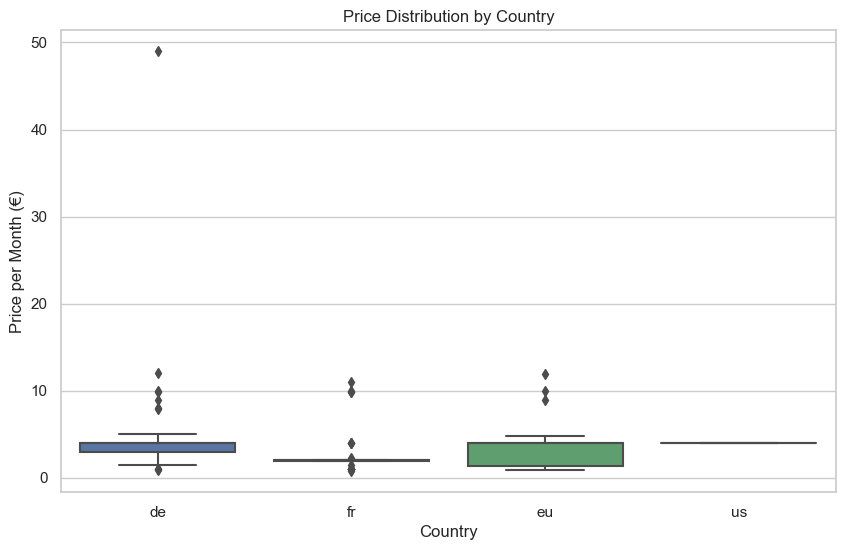

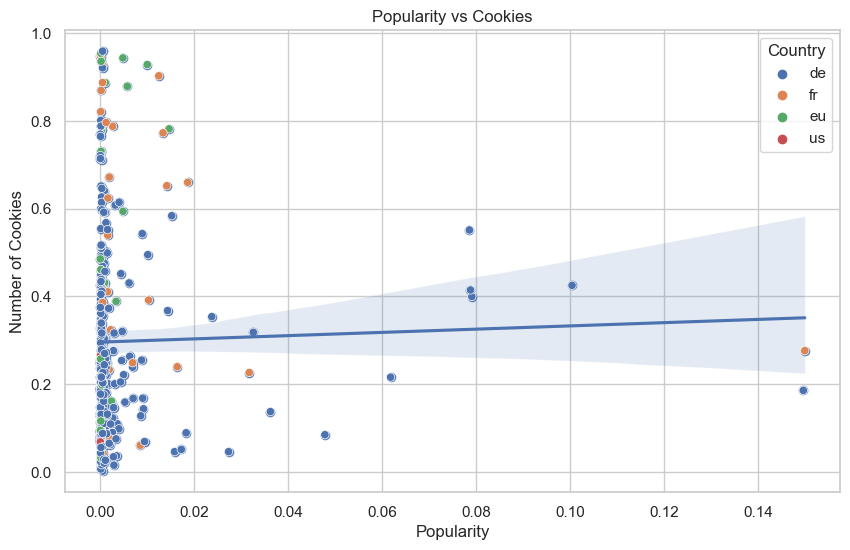

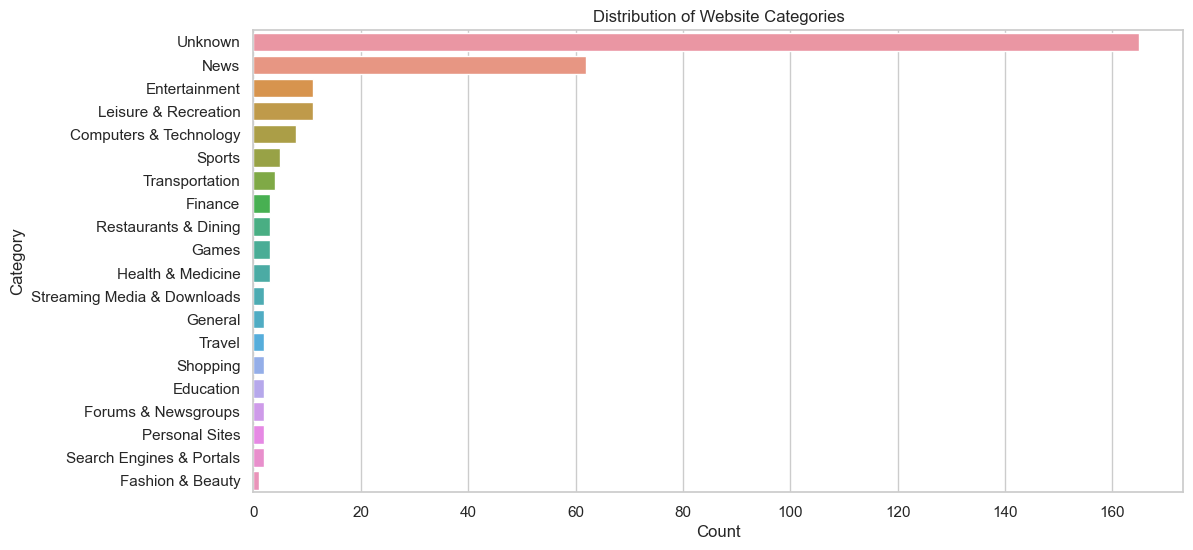

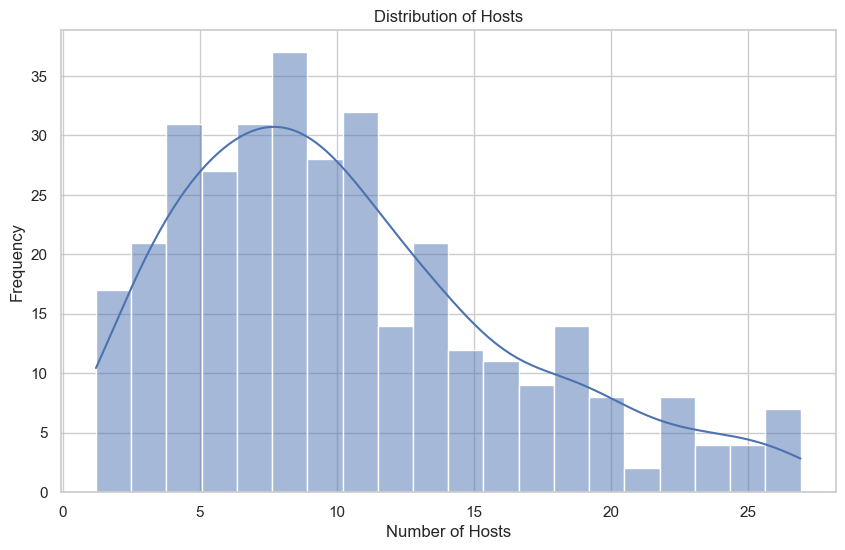

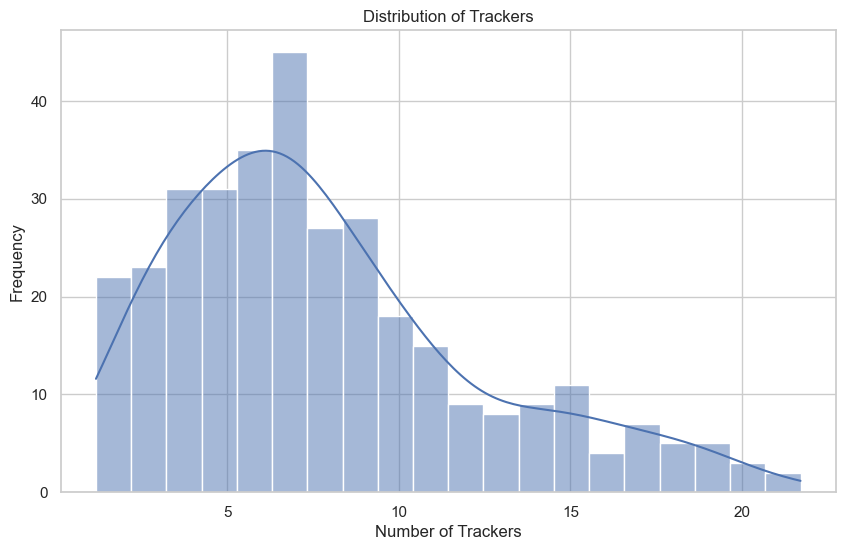

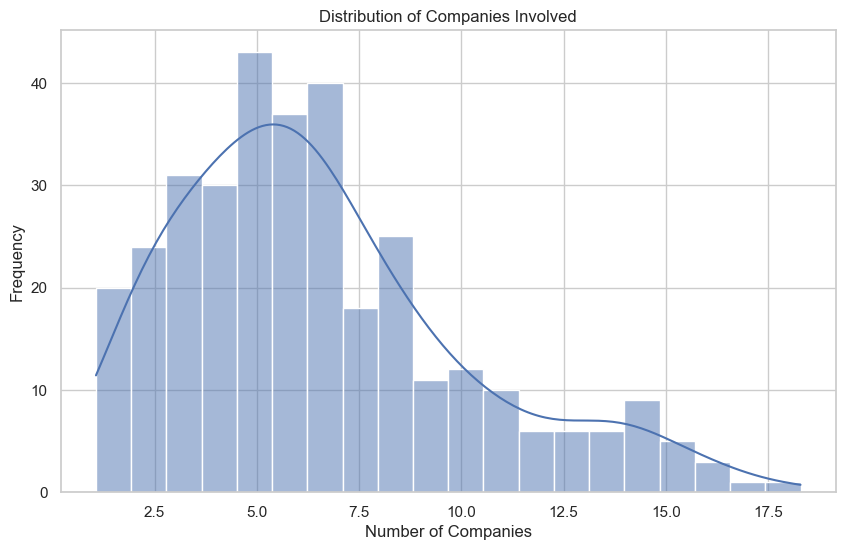

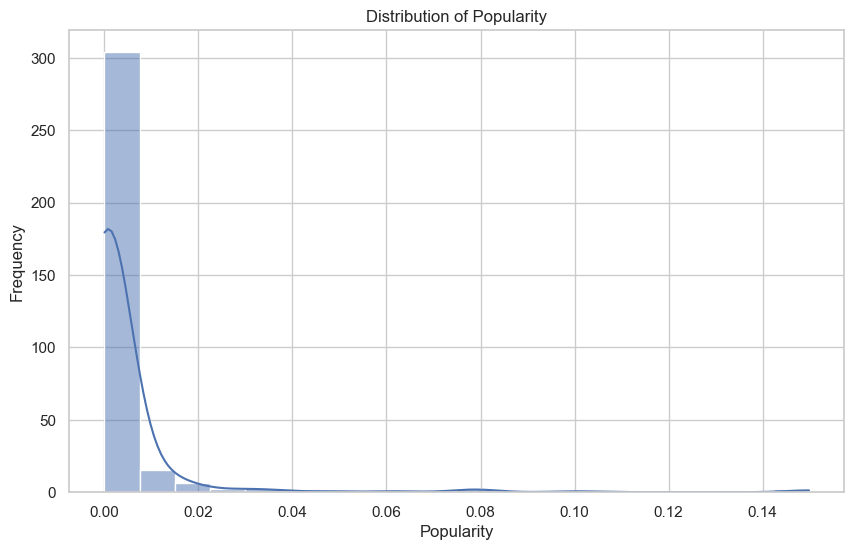

In [14]:
generate_plots(df=merged_data)

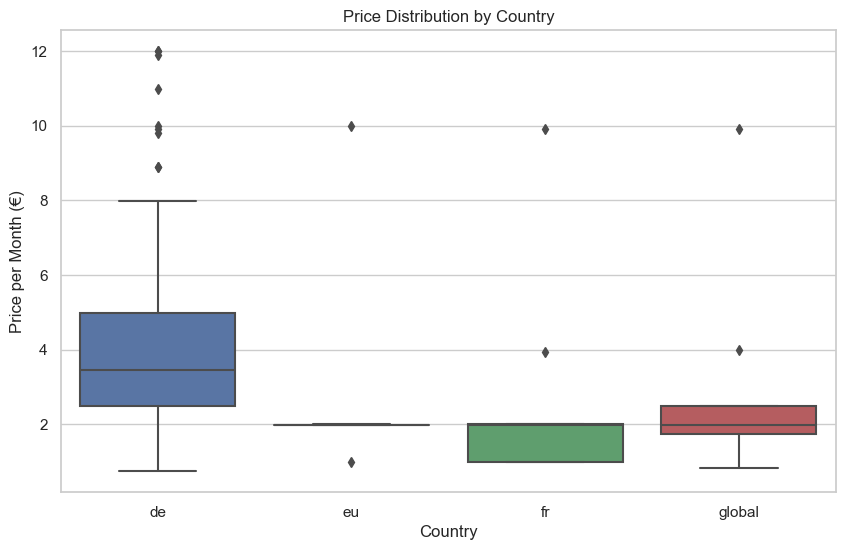

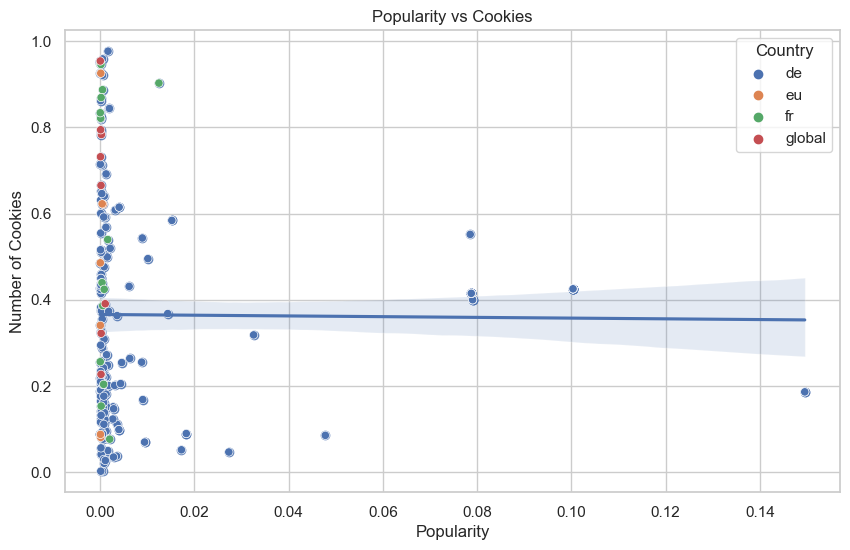

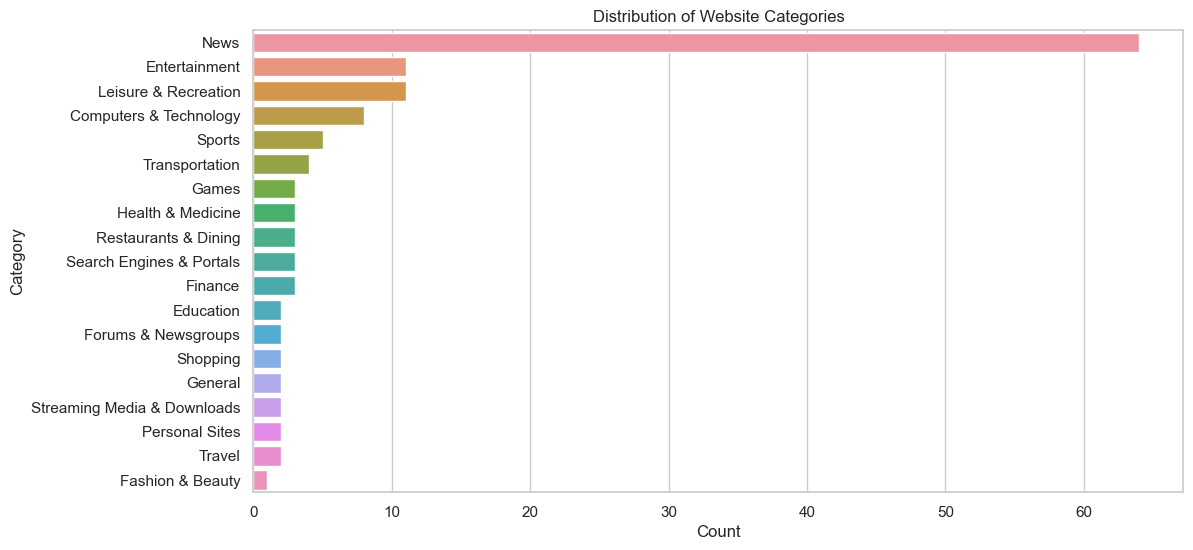

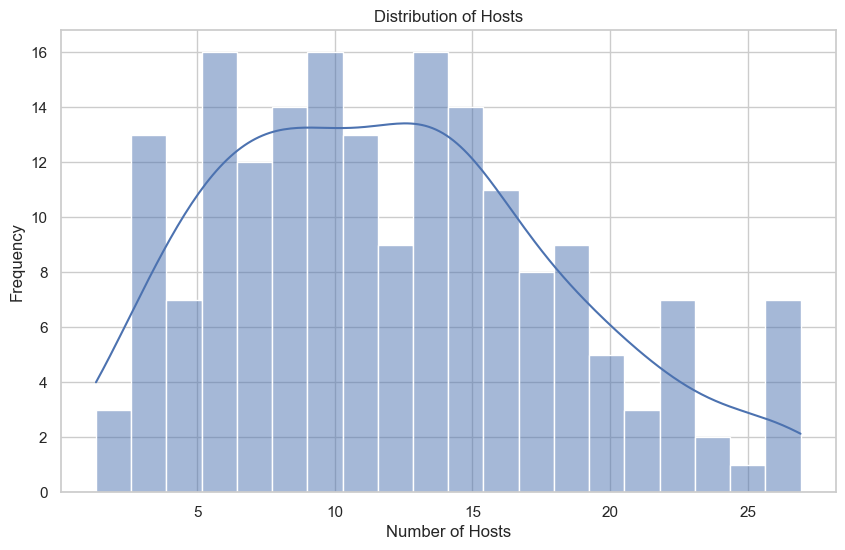

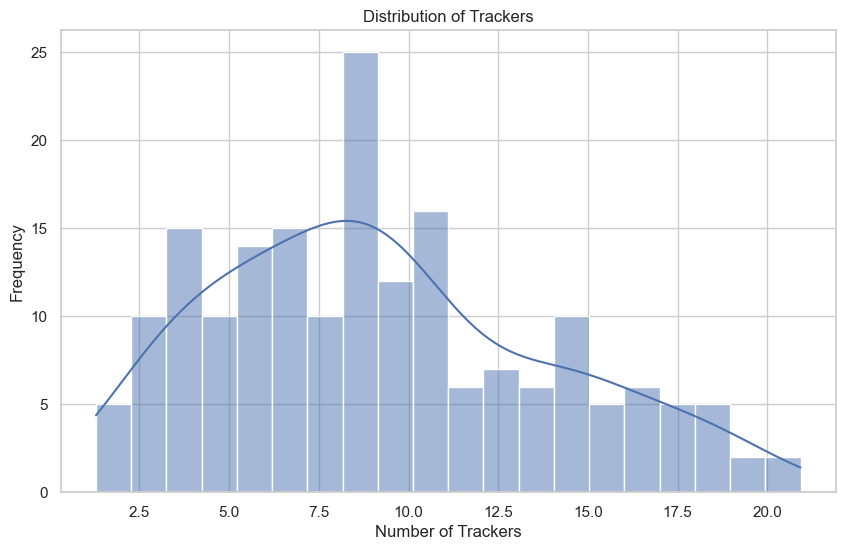

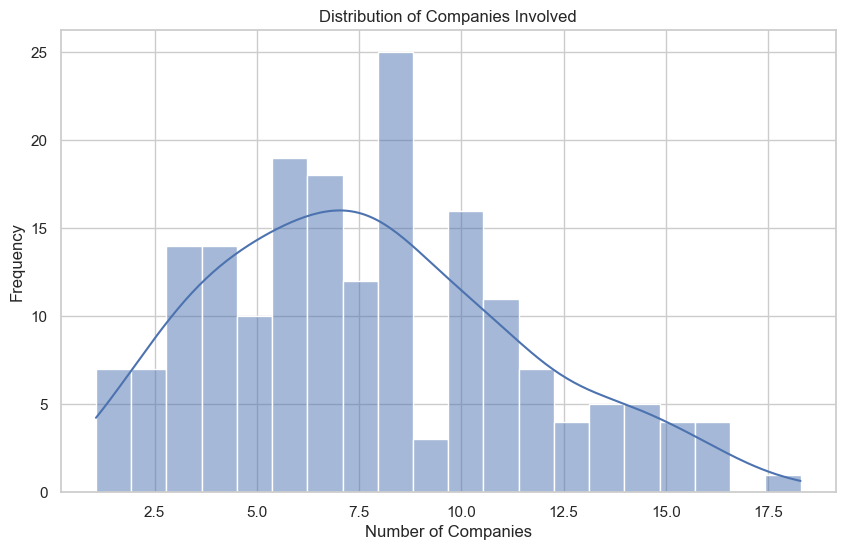

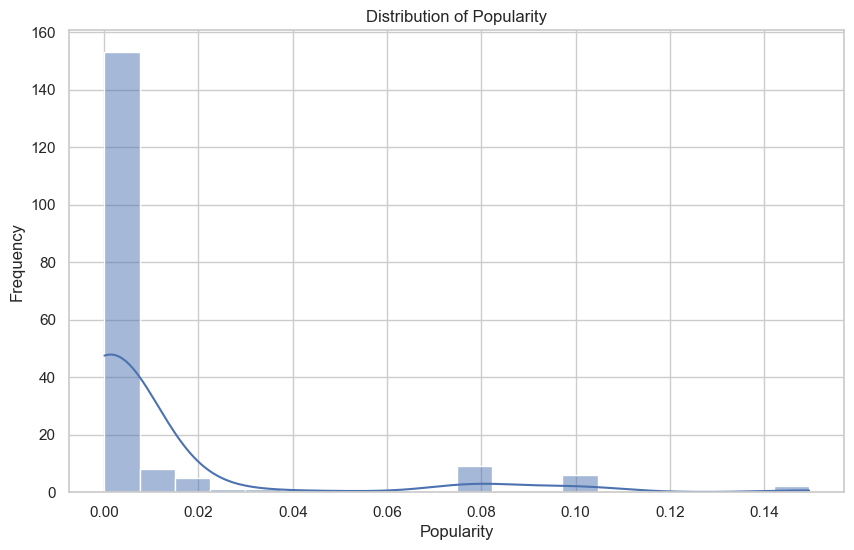

In [70]:
# now get the data without the entries where the Contentpass and Freechoice column are 1
merged_data_no_pass = merged_data[(merged_data['Contentpass'] == 0) & (merged_data['Freechoice'] == 0)]
merged_data_pass = merged_data[(merged_data['Contentpass'] == 1) | (merged_data['Freechoice'] == 1)]

# generate the plots for the merged_data_no_pass dataset
generate_plots(df=merged_data_no_pass)

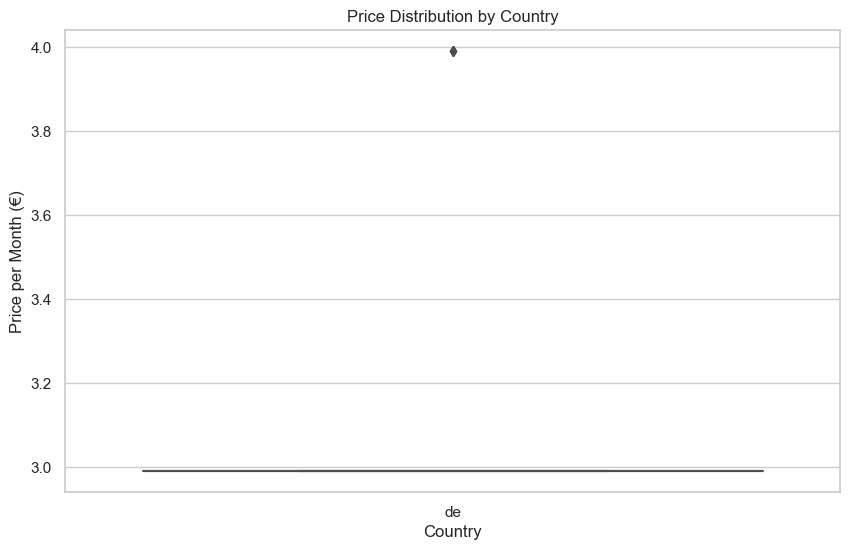

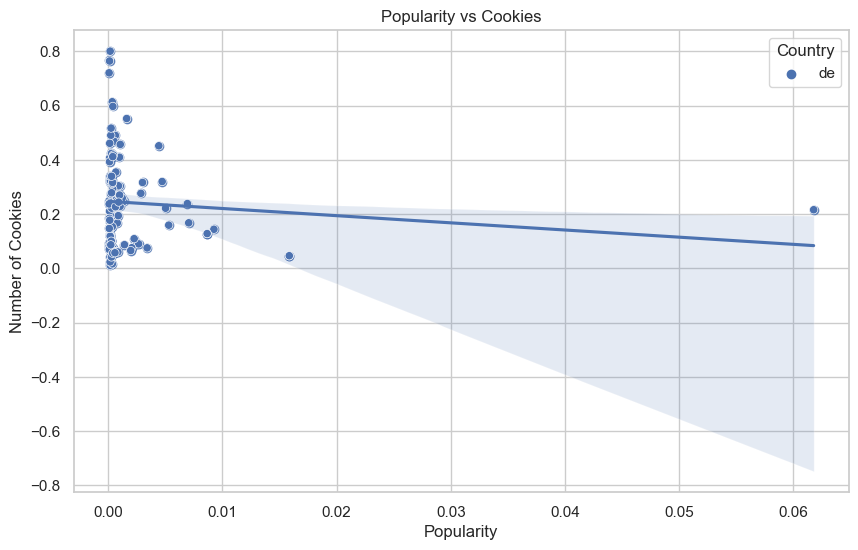

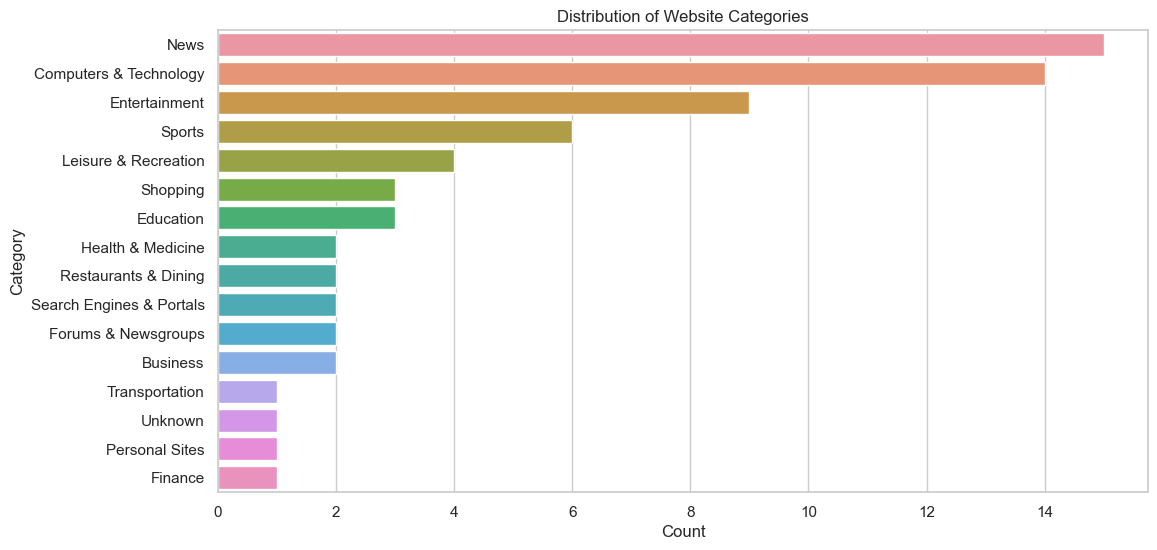

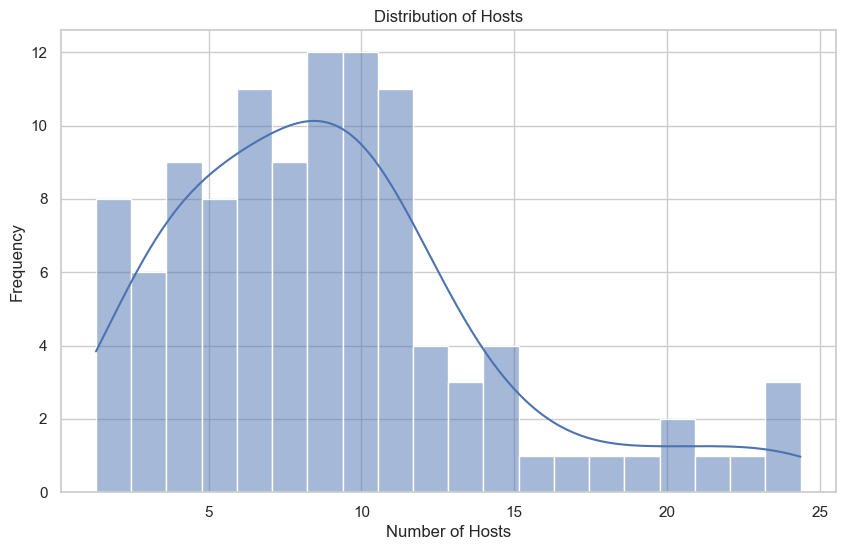

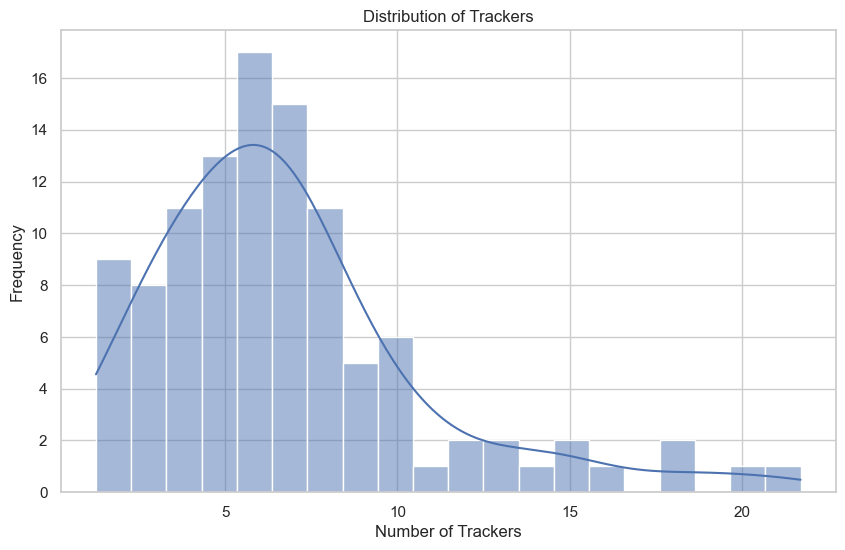

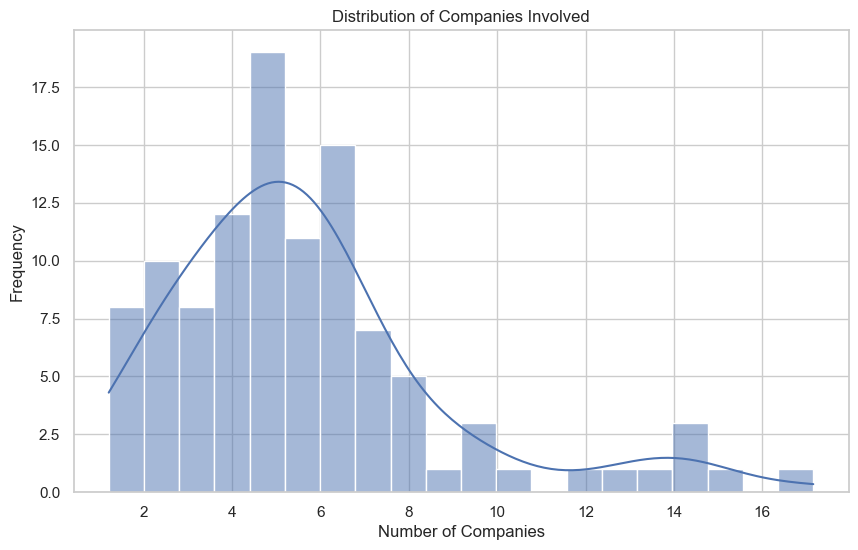

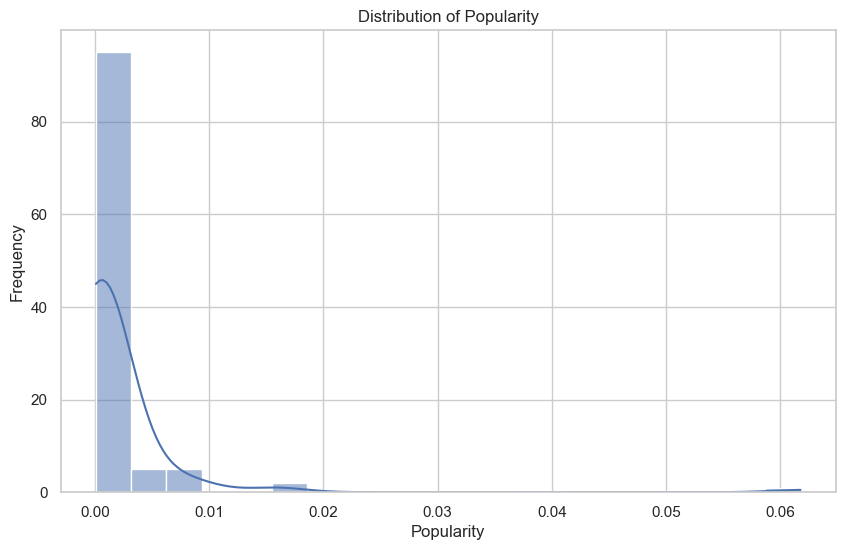

In [71]:
generate_plots(df=merged_data_pass)

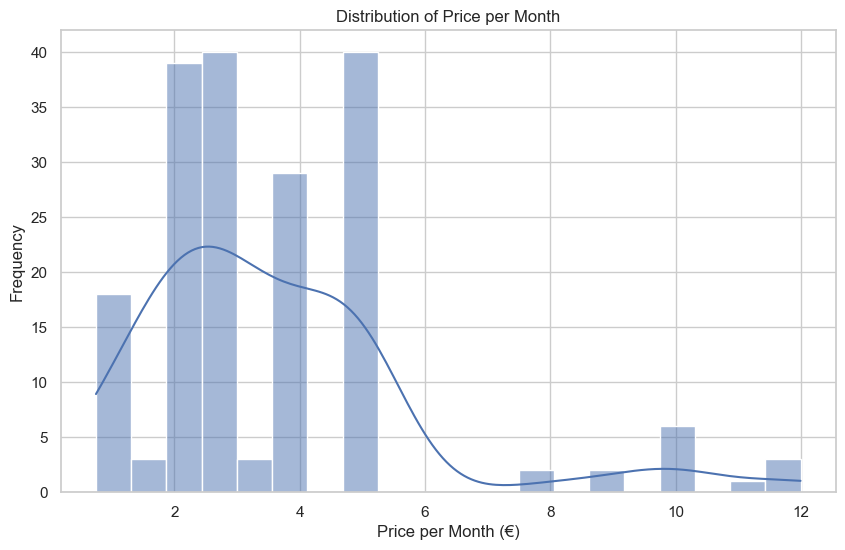

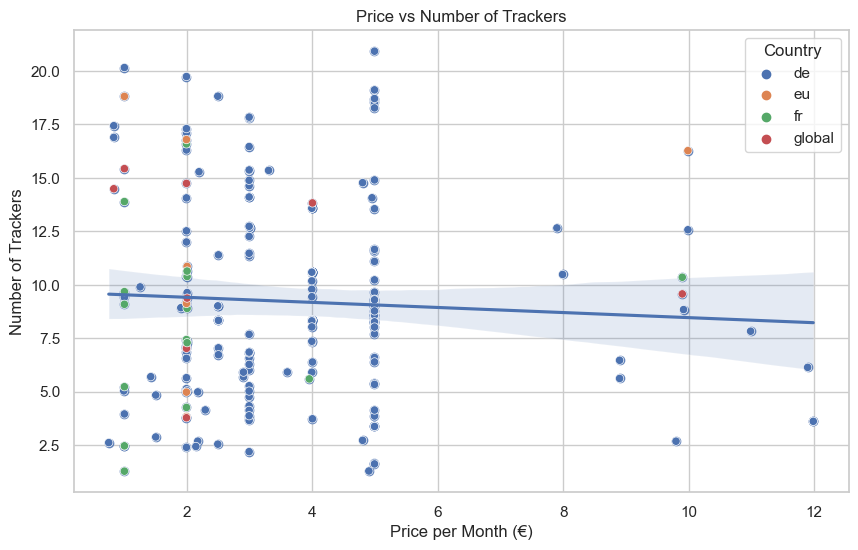

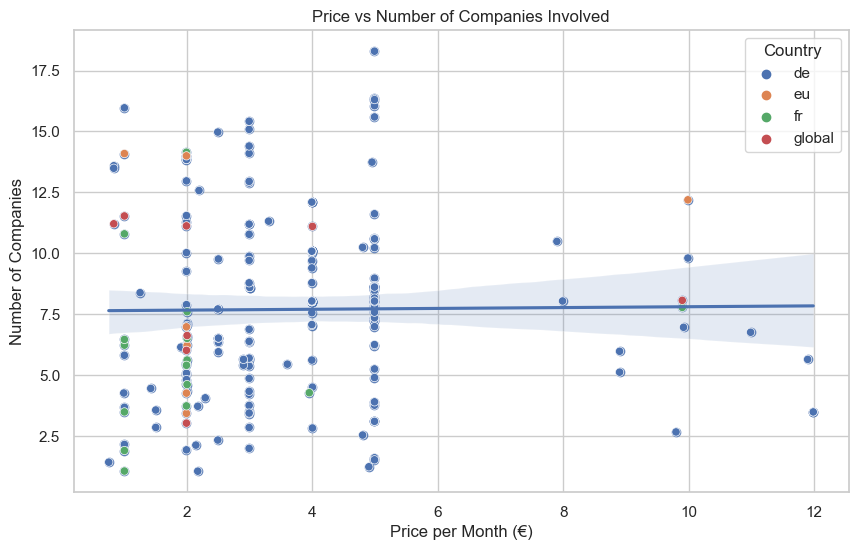

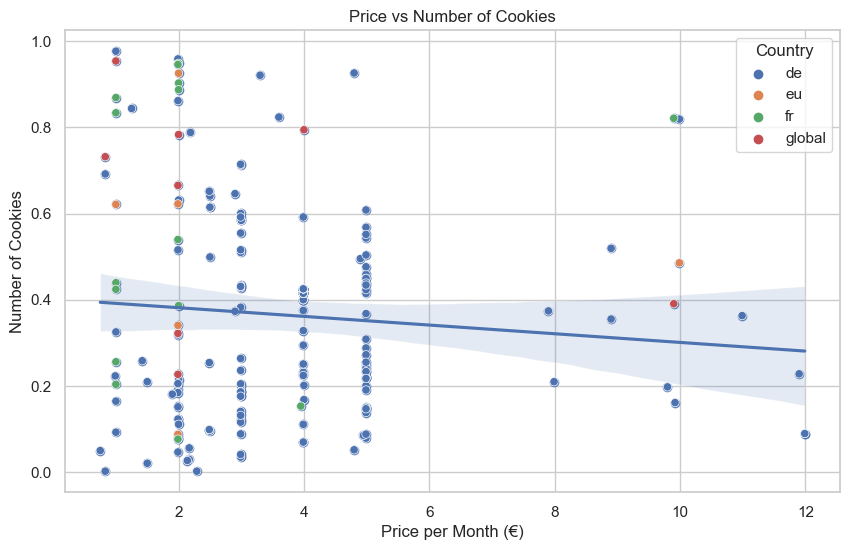

In [59]:
# now look at the price
import matplotlib.pyplot as plt
import seaborn as sns

test = merged_data_no_pass

# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(test['Price/month'], kde=True, bins=20)
plt.title('Distribution of Price per Month')
plt.xlabel('Price per Month (€)')
plt.ylabel('Frequency')
plt.show()

# Price vs Number of Trackers
plt.figure(figsize=(10, 6))
sns.regplot(x='Price/month', y='trackers', data=test)
sns.scatterplot(x='Price/month', y='trackers', hue='country', data=test)
plt.title('Price vs Number of Trackers')
plt.xlabel('Price per Month (€)')
plt.ylabel('Number of Trackers')
plt.legend(title='Country')
plt.show()

# Price vs Number of Companies Involved
plt.figure(figsize=(10, 6))
sns.regplot(x='Price/month', y='companies', data=test)
sns.scatterplot(x='Price/month', y='companies', hue='country', data=test)
plt.title('Price vs Number of Companies Involved')
plt.xlabel('Price per Month (€)')
plt.ylabel('Number of Companies')
plt.legend(title='Country')
plt.show()

# Price vs Number of Cookies
plt.figure(figsize=(10, 6))
sns.regplot(x='Price/month', y='cookies', data=test)
sns.scatterplot(x='Price/month', y='cookies', hue='country', data=test)
plt.title('Price vs Number of Cookies')
plt.xlabel('Price per Month (€)')
plt.ylabel('Number of Cookies')
plt.legend(title='Country')
plt.show()


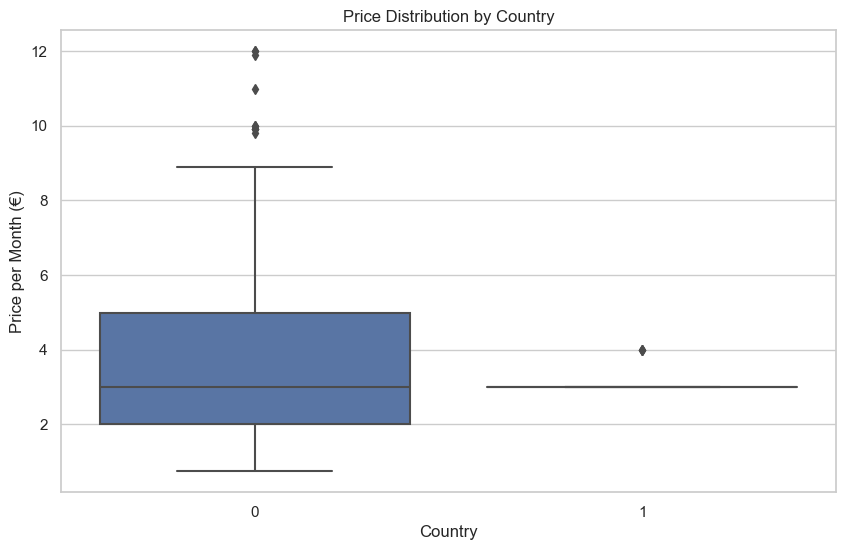

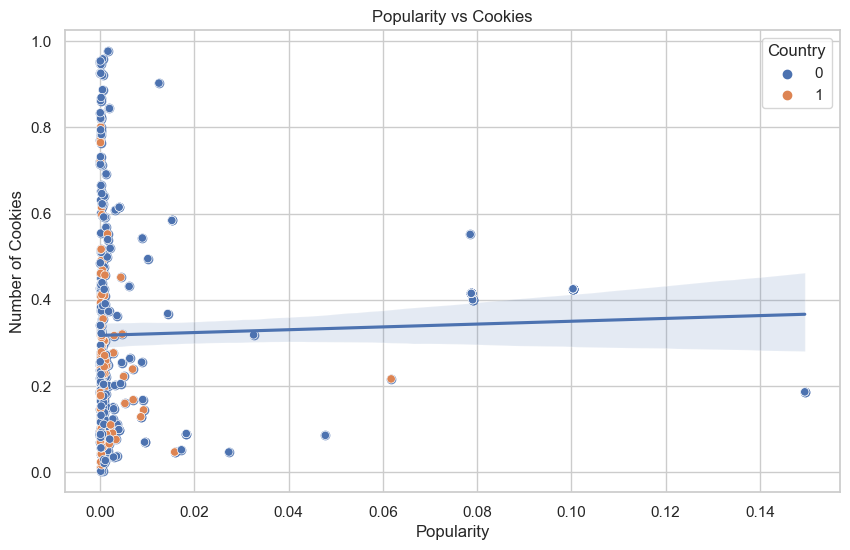

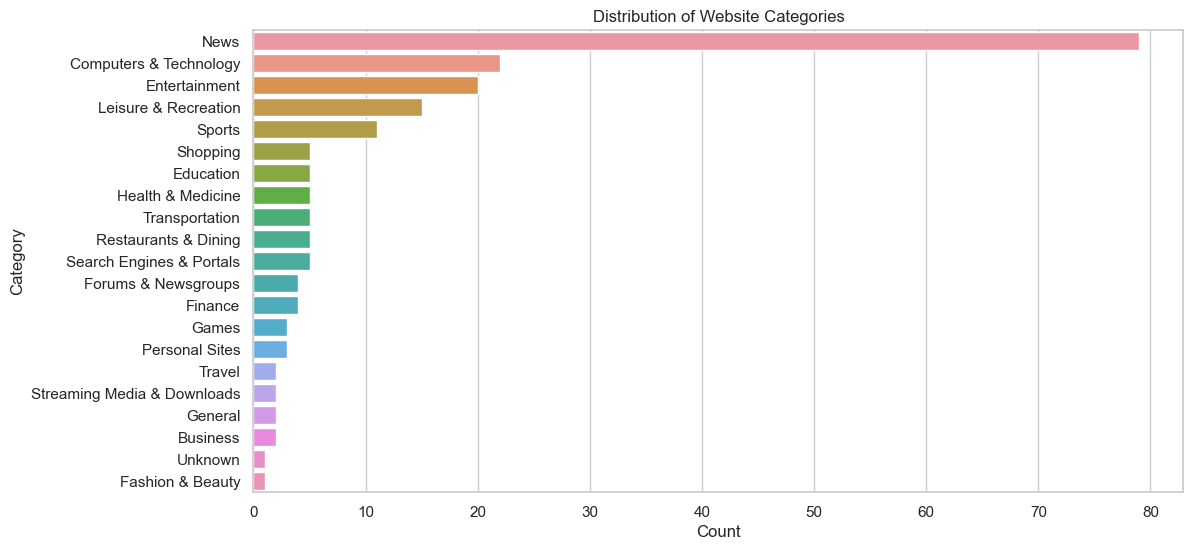

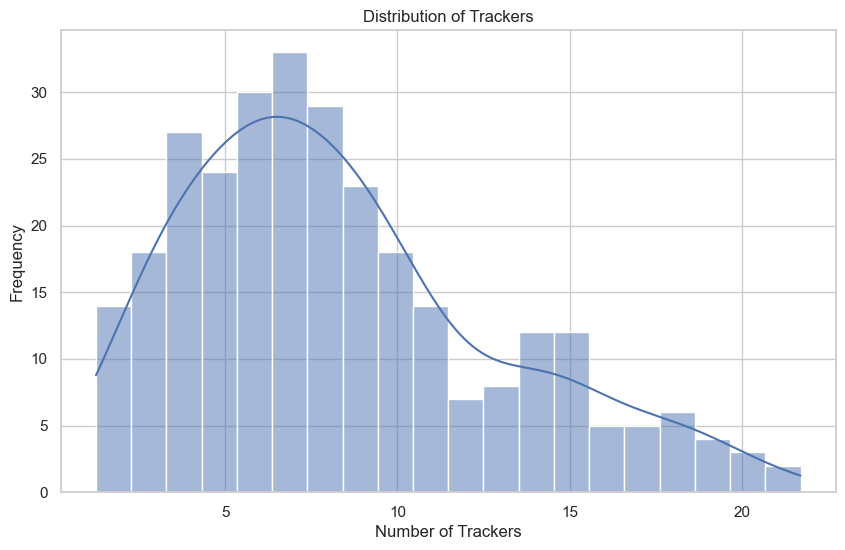

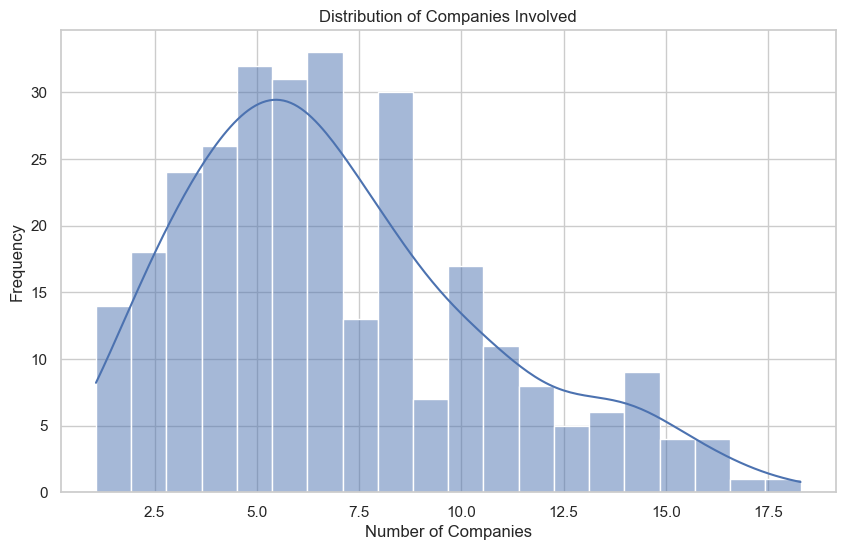

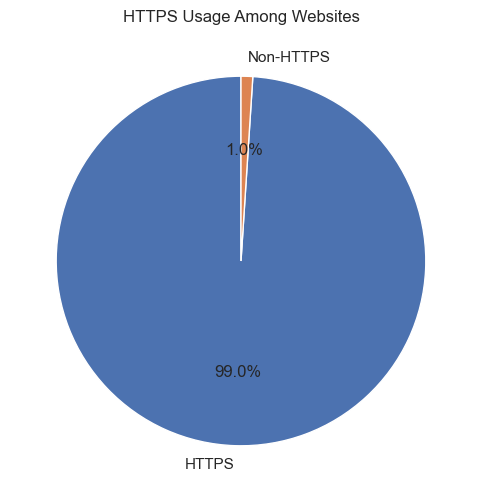

In [61]:
# now make a extra variable that indicates if the website is a freechoice or contentpass website
# 1 if it is a freechoice or contentpass website, 0 otherwise
merged_data['pass'] = 0
merged_data.loc[(merged_data['Contentpass'] == 1) | (merged_data['Freechoice'] == 1), 'pass'] = 1
# now look at the popularity and cookies

generate_plots(df=merged_data, country_col='pass')

